## OBJECTIVE:

### You have been enlisted to provide support to a hotel's project aimed at enhancing revenue generated from room bookings. The hotel believes that leveraging data science can effectively minimize booking cancellations. This is where your expertise becomes invaluable.

### Your task entails employing suitable methodologies to determine the factors influencing whether a booking will be fulfilled or cancelled. The hotel intends to utilize the insights derived from your analysis to proactively reduce the likelihood of booking cancellations.

In [1]:
# import necessary modules and packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import datetime
from datetime import datetime

In [2]:
# read the csv file

hotel_df = pd.read_csv('Downloads/hotel_bookings.csv')
hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [3]:
#brief exploration of our data
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [4]:
#checking for the amount of missing values
hotel_df.isna().sum()

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

### Handling missing values

<AxesSubplot:>

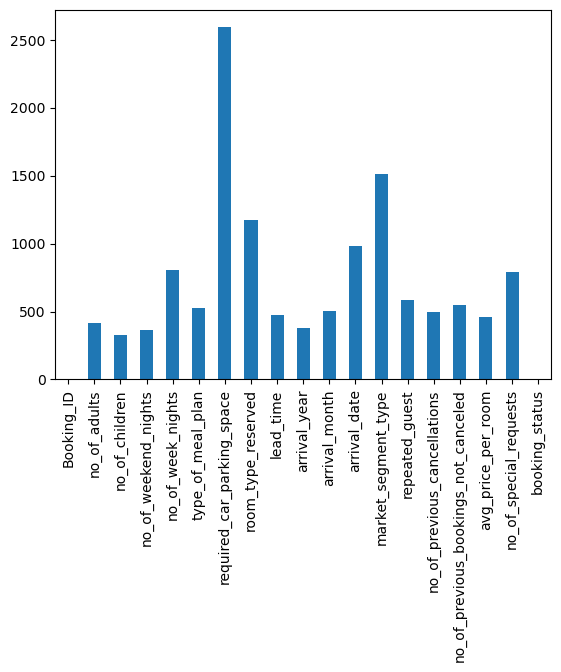

In [5]:
#visualization of missing values
hotel_df.isna().sum().plot(kind='bar')

In [6]:
#handling missing values 
#first using the rule of 5 to drop missing values

threshold = len(hotel_df) * 0.05
print('threshold_value :',threshold)

cols_to_drop = hotel_df.columns[hotel_df.isna().sum() <= threshold]
print('\n', cols_to_drop)

hotel_df.dropna(subset=cols_to_drop, inplace=True)

threshold_value : 1813.75

 Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'room_type_reserved',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')


In [7]:
#check for columns left with missing values
print(hotel_df.isna().sum())

#view the unique value of the required_car_parking_space column
print('\n', 'Unique values: ')
print(hotel_df['required_car_parking_space'].unique())

#finding the missing value and replacing with the most occured value
mode_parking_space = statistics.mode(hotel_df['required_car_parking_space'])
mode_parking_space
hotel_df['required_car_parking_space'] = hotel_df['required_car_parking_space'].fillna(mode_parking_space)

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                          0
required_car_parking_space              1689
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                         0
no_of_special_requests                     0
booking_status                             0
dtype: int64

 Unique values: 
[ 0. nan  1.]


In [8]:
#check for missing values 
hotel_df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
#view the various column types
hotel_df.dtypes

Booking_ID                               object
no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
type_of_meal_plan                        object
required_car_parking_space              float64
room_type_reserved                       object
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
market_segment_type                      object
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
booking_status                           object
dtype: object

In [10]:
#convert columns data type to their correct data type

hotel_df[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights',
          'lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests']] = hotel_df[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights'
          ,'lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests']].astype('int')

hotel_df[['required_car_parking_space','repeated_guest']] = hotel_df[['required_car_parking_space','repeated_guest']].astype('category')

#cleaning the dates columns
hotel_df['arrival_year'] = pd.to_datetime(hotel_df['arrival_year'], format='%Y').dt.year  

hotel_df['arrival_month'] = pd.to_datetime(hotel_df['arrival_month'], format='%m').dt.month

hotel_df['arrival_date'] = pd.to_datetime(hotel_df['arrival_date'], format='%d').dt.day

#rename arrival_date column
hotel_df.rename(columns={'arrival_date':'arrival_day'},inplace=True)

In [11]:
#creating a new column called arrival_date
hotel_df['arrival_date'] = pd.to_datetime(hotel_df['arrival_year'].astype(str) + '-' + hotel_df['arrival_month'].astype(str) + '-' + hotel_df['arrival_day'].astype(str),format= '%Y-%m-%d',errors='coerce')
hotel_df['arrival_date'] = hotel_df['arrival_date'].apply(lambda x:x,'%Y-%m-%d')
hotel_df['arrival_date']

#create a new column for arrival_day_of_week
#creating a day of week column from the date column
hotel_df['arrival_day_of_week'] = hotel_df['arrival_date'].dt.day_name()
hotel_df['arrival_day_of_week']

#creating a month_name column from the date column
hotel_df['month_name'] = hotel_df['arrival_date'].dt.strftime('%b')


In [12]:
#inspect the various column types
hotel_df.dtypes

Booking_ID                                      object
no_of_adults                                     int32
no_of_children                                   int32
no_of_weekend_nights                             int32
no_of_week_nights                                int32
type_of_meal_plan                               object
required_car_parking_space                    category
room_type_reserved                              object
lead_time                                        int32
arrival_year                                     int64
arrival_month                                    int64
arrival_day                                      int64
market_segment_type                             object
repeated_guest                                category
no_of_previous_cancellations                     int32
no_of_previous_bookings_not_canceled             int32
avg_price_per_room                             float64
no_of_special_requests                           int32
booking_st

## Data Cleaning

The dataset contained 36275 rows and 19 columns, and these were what I did to the columns:
 - From the graph above it shows that each column contained alot of missing data .
 
 - All rows with missing data in the dataframe was dropped using the rule of 5%.
 
 - The mode(most occured) value was used in filling nan values were relevant.
 
 - The data types were changed to the accurate type were necessary.
 
 - From the date columns an additional datetime column called 'arrival_date' was created from arrival year,month and date.
 
 - Also new columns 'arrival_day_of_week', 'month_name' was created from the arrival date column
  
At the end there was 29200 rows and 22 columns .

In [13]:
#view the dataframe 
hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_date,arrival_day_of_week,month_name
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,...,Online,0.0,0,0,106.68,1,Not_Canceled,2018-11-06,Tuesday,Nov
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,...,Online,0.0,0,0,60.00,0,Canceled,2018-02-28,Wednesday,Feb
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,...,Online,0.0,0,0,100.00,0,Canceled,2018-05-20,Sunday,May
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,...,Online,0.0,0,0,94.50,0,Canceled,2018-04-11,Wednesday,Apr
5,INN00006,2,0,0,2,Meal Plan 2,0.0,Room_Type 1,346,2018,...,Online,0.0,0,0,115.00,1,Canceled,2018-09-13,Thursday,Sep


### Exploratory Data Analysis

In [14]:
#describing the numerical columns
hotel_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_day,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29200.000000,29200.000000,29200.000000,29200.000000,29200.000000,29200.000000,29200.000000,29200.000000,29200.000000,29200.000000,29200.000000,29200.000000
mean,1.845377,0.104863,0.813801,2.203048,85.246712,2017.820788,7.422432,15.574760,0.024041,0.164452,103.449164,0.621096
std,0.518135,0.404642,0.871021,1.409376,86.037586,0.383537,3.065125,8.729718,0.372389,1.869948,35.152881,0.786844
min,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,120.120000,1.000000
max,4.000000,10.000000,6.000000,17.000000,443.000000,2018.000000,12.000000,31.000000,13.000000,58.000000,540.000000,5.000000


In [15]:
#describing the categorical columns
hotel_df.describe(exclude=[np.number])

C:\Users\USER\AppData\Local\Temp\ipykernel_3088\2160440987.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hotel_df.describe(exclude=[np.number])


,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,booking_status,arrival_date,arrival_day_of_week,month_name
count,29200,29200,29200.0,29200,29200,29200.0,29200,29170,29170,29170
unique,29200,4,2.0,7,5,2.0,2,548,7,12
top,INN00002,Meal Plan 1,0.0,Room_Type 1,Online,0.0,Not_Canceled,2018-10-13 00:00:00,Sunday,Oct
freq,1,22447,28342.0,22656,18678,28435.0,19635,203,4946,4305
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31 00:00:00,NaN,NaN


In [16]:
#value counting the categorical columns

columns = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status','arrival_day_of_week','month_name']

for cols in columns:
    print(hotel_df[cols].value_counts())

Meal Plan 1     22447
Not Selected     4125
Meal Plan 2      2623
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    22656
Room_Type 4     4860
Room_Type 6      786
Room_Type 2      554
Room_Type 5      210
Room_Type 7      129
Room_Type 3        5
Name: room_type_reserved, dtype: int64
Online           18678
Offline           8461
Corporate         1633
Complementary      321
Aviation           107
Name: market_segment_type, dtype: int64
Not_Canceled    19635
Canceled         9565
Name: booking_status, dtype: int64
Sunday       4946
Saturday     4370
Monday       4306
Wednesday    4149
Tuesday      3976
Friday       3767
Thursday     3656
Name: arrival_day_of_week, dtype: int64
Oct    4305
Sep    3700
Aug    3041
Jun    2611
Dec    2424
Nov    2386
Jul    2341
Apr    2201
May    2122
Mar    1919
Feb    1319
Jan     801
Name: month_name, dtype: int64


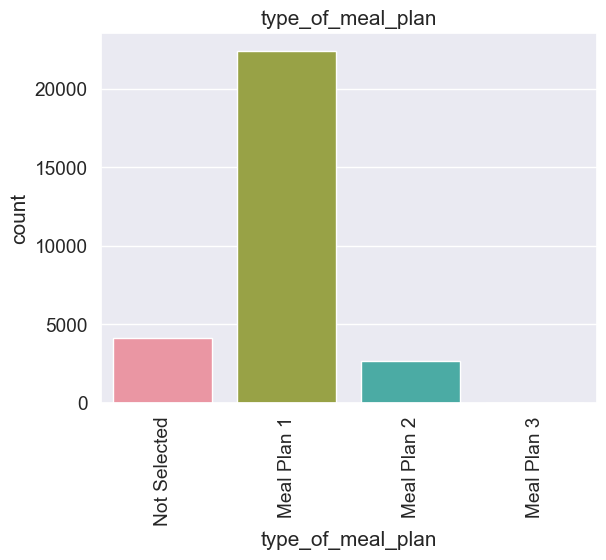

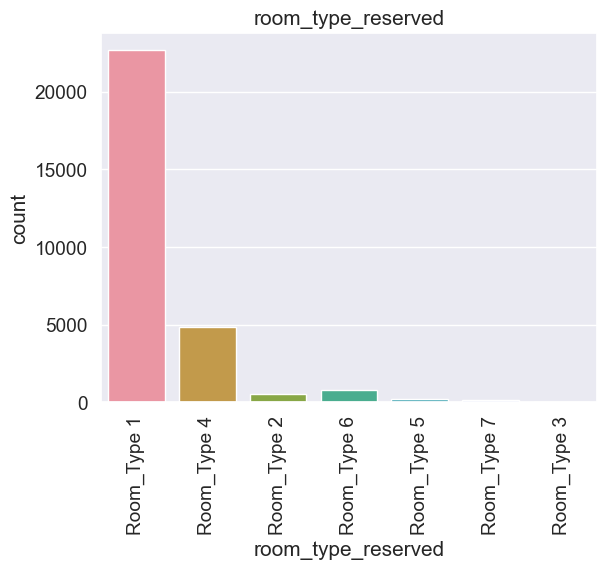

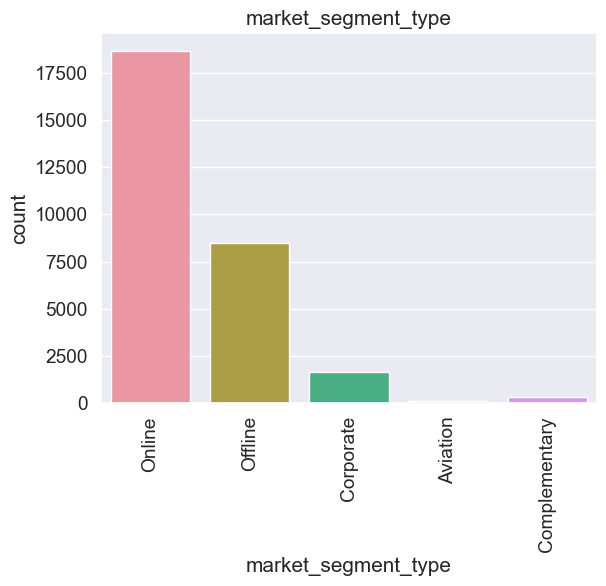

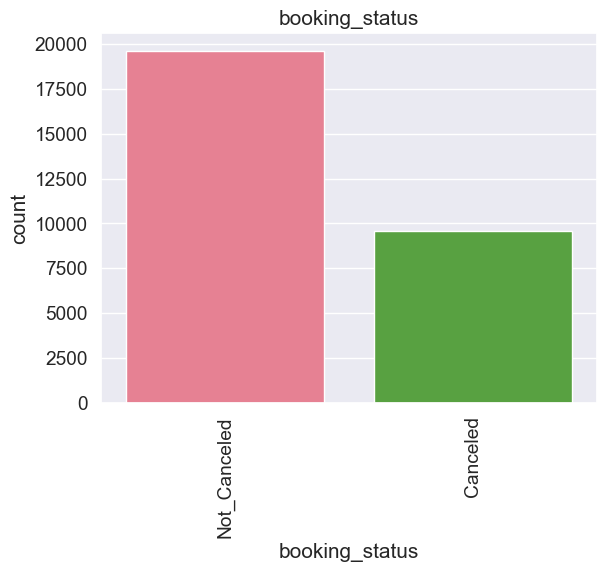

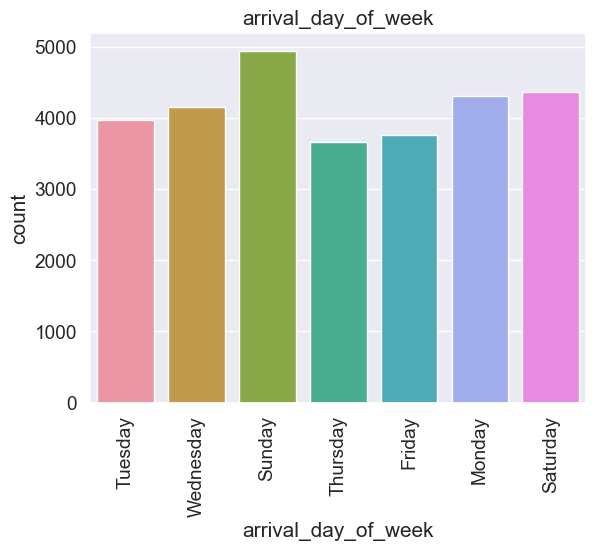

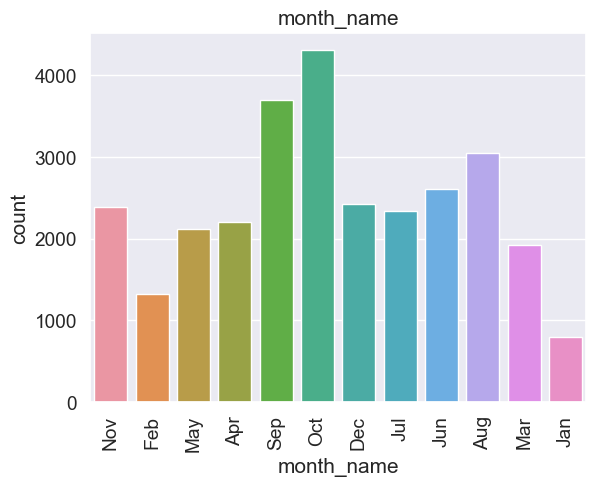

In [17]:
#visualize the information above for easy understanding
#value counting the categorical columns

columns = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status','arrival_day_of_week','month_name']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=hotel_df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

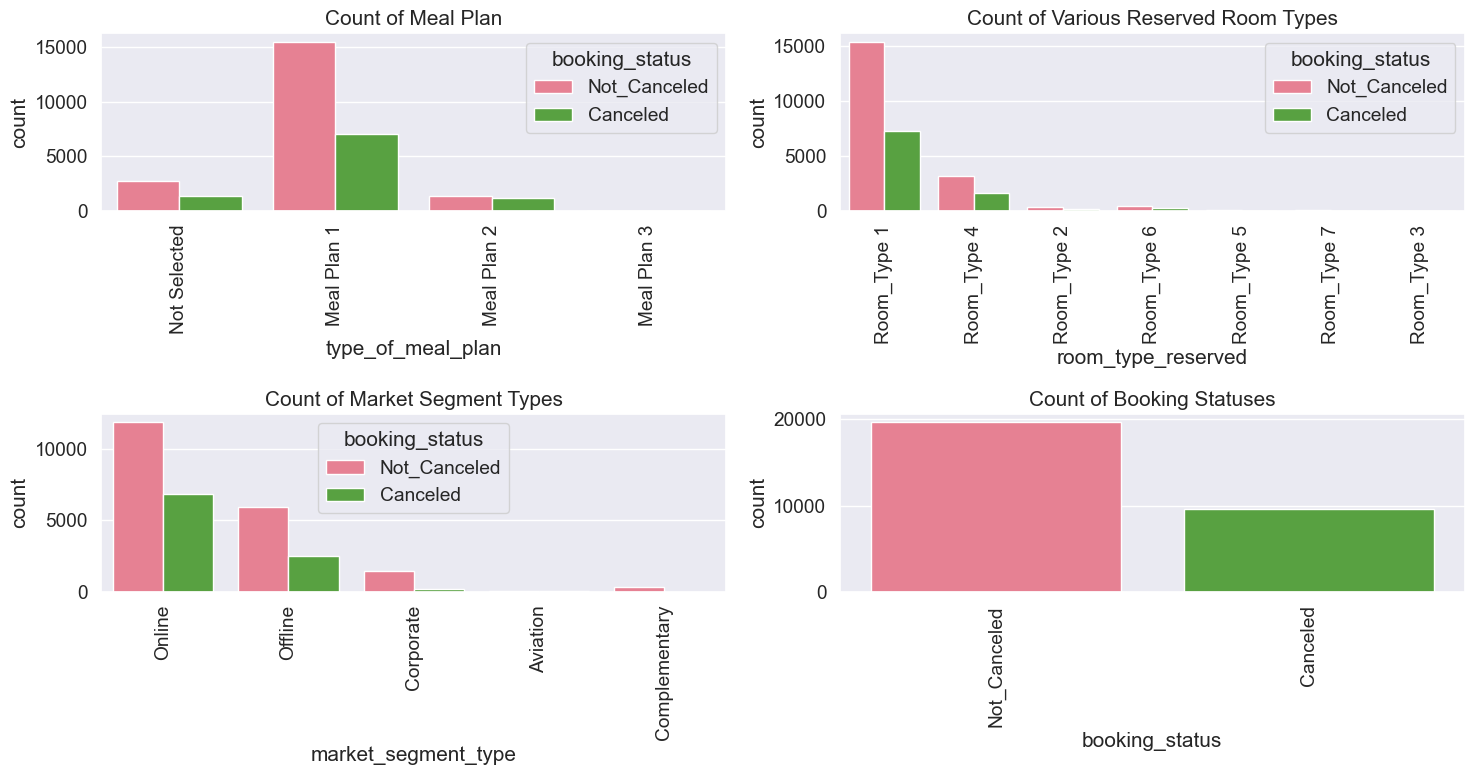

In [18]:
#exploring the various categorical columns based on booking status

sns.set_style('darkgrid')
fig,axs = plt.subplots(nrows=2, ncols=2,sharey=False,figsize=(15,8))
fig.subplots_adjust(hspace=0.5)
g = sns.countplot(x='type_of_meal_plan',hue='booking_status', data=hotel_df, ax=axs[0,0])
g.set_title('Count of Meal Plan')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=90)
g= sns.countplot(x='room_type_reserved',hue='booking_status', data=hotel_df, ax=axs[0,1])
g.set_title('Count of Various Reserved Room Types')
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=90)
g= sns.countplot(x='market_segment_type',hue='booking_status',data =hotel_df, ax=axs[1,0])
g.set_title('Count of Market Segment Types')
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=90)
g= sns.countplot(x='booking_status',data=hotel_df, ax=axs[1,1])
g.set_title('Count of Booking Statuses')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=90)
fig.tight_layout();
plt.show()

In [19]:
hotel_df.groupby('booking_status')['no_of_previous_cancellations'].value_counts().to_frame()

no_of_previous_cancellations
booking_status no_of_previous_cancellations                              
Canceled       0                                                     9554
               1                                                        7
               13                                                       4
Not_Canceled   0                                                    19366
               1                                                      158
               2                                                       35
               3                                                       35
               11                                                      19
               5                                                       11
               4                                                       10
               6                                                        1

In [20]:
hotel_df.groupby('booking_status')['no_of_previous_bookings_not_canceled'].value_counts().to_frame()

no_of_previous_bookings_not_canceled
booking_status no_of_previous_bookings_not_canceled                                      
Canceled       0                                                                     9560
               1                                                                        4
               6                                                                        1
Not_Canceled   0                                                                    18974
               1                                                                      178
...                                                                                   ...
               54                                                                       1
               55                                                                       1
               56                                                                       1
               57                                                                       1
               58                                                                       1

[62 rows x 1 columns]

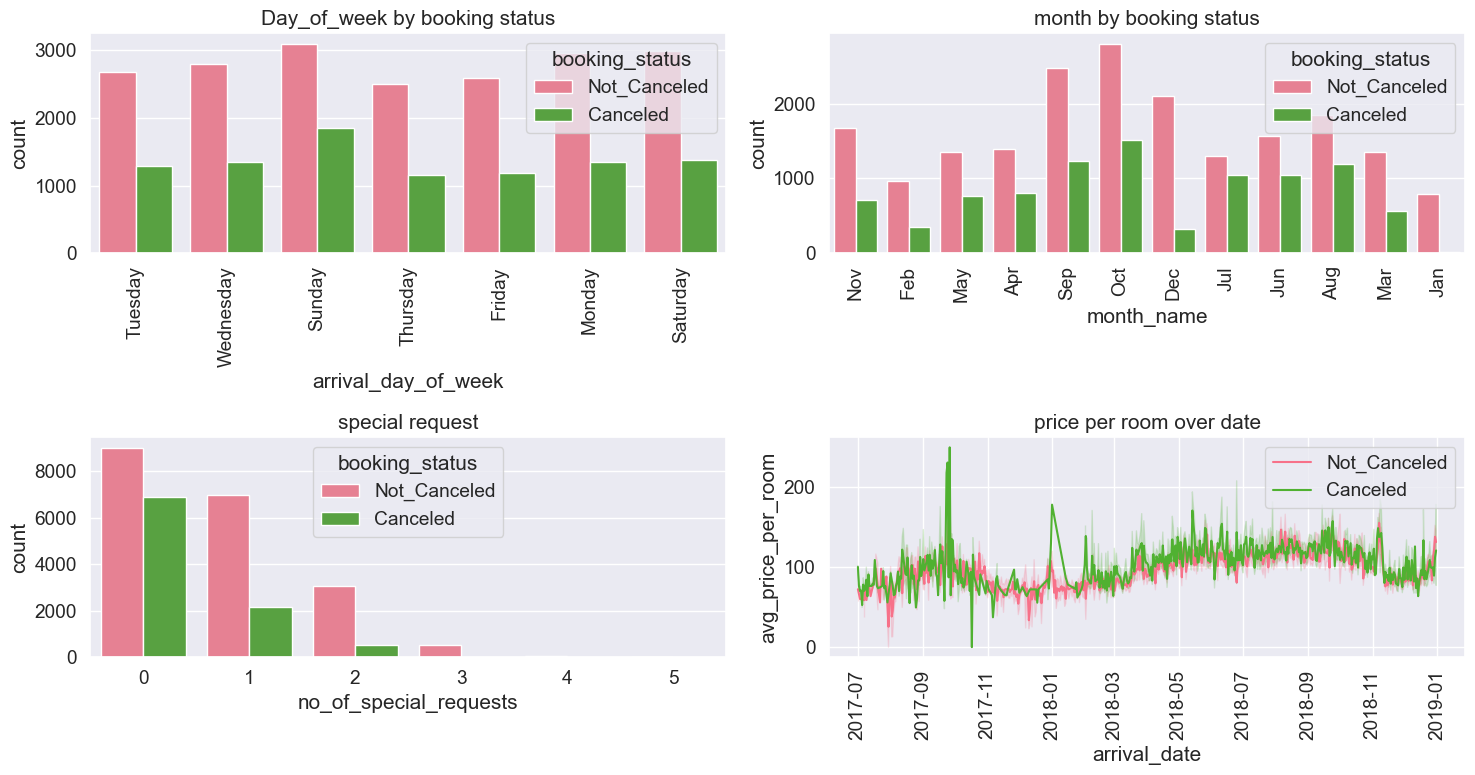

In [21]:
#exploring the various categorical columns based on booking status

fig,axs = plt.subplots(nrows=2, ncols=2, sharey=False,figsize=(15,8))
fig.subplots_adjust(hspace=0.5)
g = sns.countplot(x='arrival_day_of_week', hue='booking_status', data=hotel_df, ax=axs[0,0])
g.set_title('Day_of_week by booking status')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=90)
g = sns.countplot(x='month_name', hue='booking_status', data=hotel_df, ax=axs[0,1])
g.set_title('month by booking status')
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=90)
g = sns.countplot(x='no_of_special_requests',hue ='booking_status' ,data=hotel_df, ax=axs[1,0])
g.set_title('special request')
g = sns.lineplot(x='arrival_date', y='avg_price_per_room' ,hue ='booking_status' ,data=hotel_df, ax=axs[1,1])
g.set_title('price per room over date')
plt.xticks(rotation=90)
fig.tight_layout()
plt.legend()
plt.show()

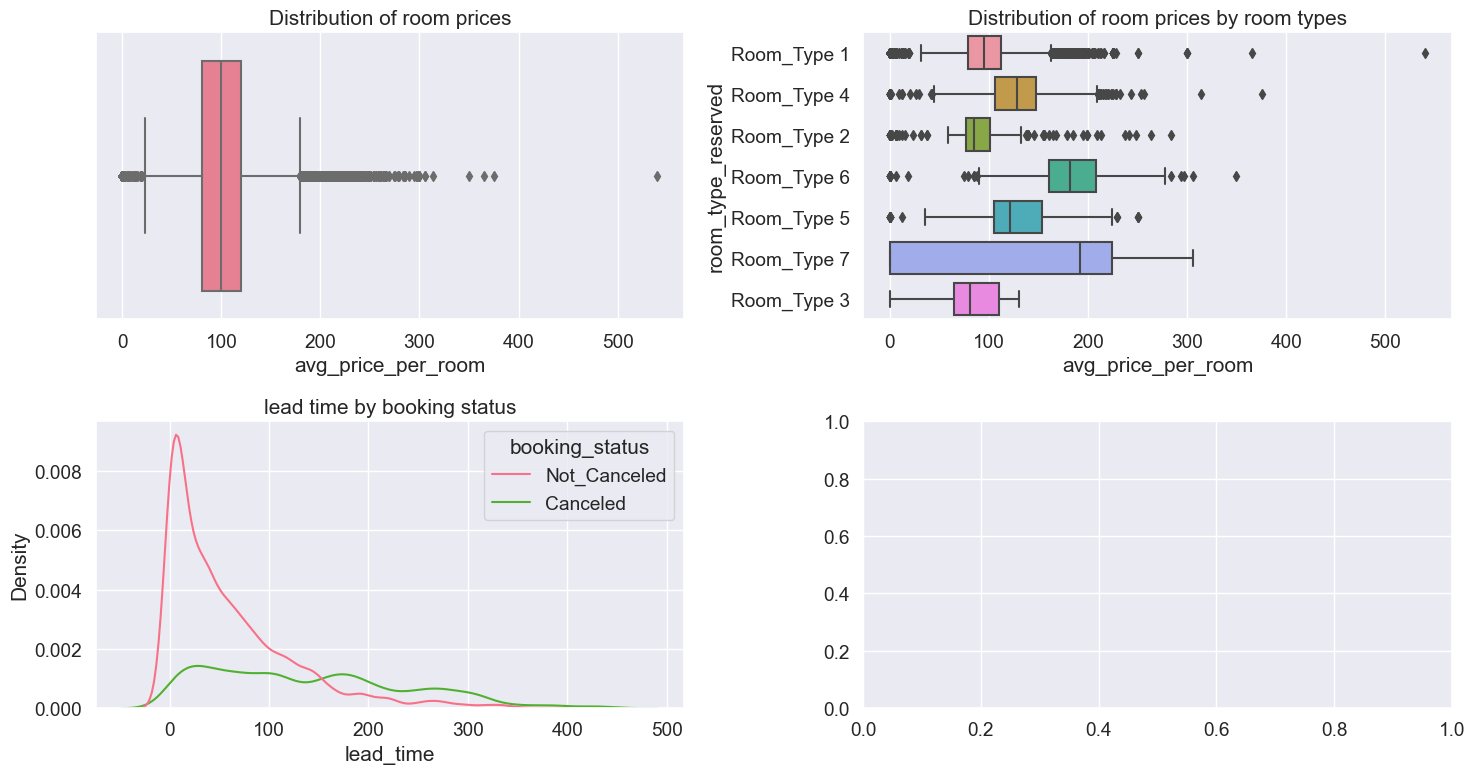

In [22]:
#Distribution of avg price of room

fig,axs = plt.subplots(nrows=2, ncols=2,sharey=False,figsize=(15,8))
fig.subplots_adjust(hspace=0.5)
g = sns.boxplot(x='avg_price_per_room', data=hotel_df, ax=axs[0,0])
g.set_title('Distribution of room prices')
g = sns.boxplot(x='avg_price_per_room', y='room_type_reserved', data=hotel_df, ax=axs[0,1])
g.set_title('Distribution of room prices by room types')
g = sns.kdeplot(x='lead_time', hue='booking_status', data=hotel_df, ax=axs[1,0])
g.set_title('lead time by booking status')
fig.tight_layout()
plt.show()

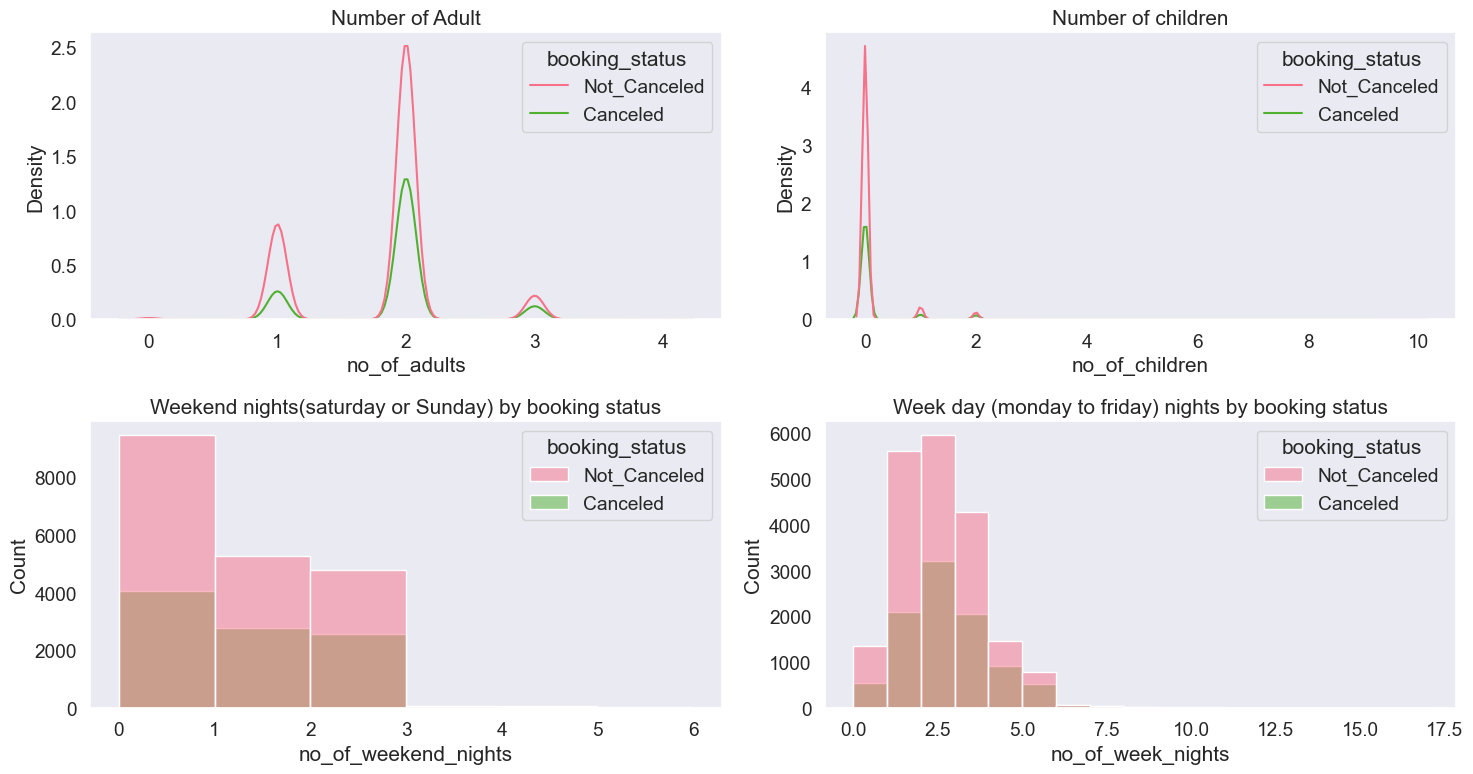

In [23]:
#visualiztion of variables
sns.set_style('dark')
fig,axs = plt.subplots(nrows=2, ncols=2, sharey=False,figsize=(15,8))
fig.subplots_adjust(hspace=0.5)

g = sns.kdeplot(x='no_of_adults',hue='booking_status',data=hotel_df,ax=axs[0,0])
g.set_title('Number of Adult')
g = sns.kdeplot(x='no_of_children',hue='booking_status',data=hotel_df,ax=axs[0,1])
g.set_title('Number of children')
g = sns.histplot(x='no_of_weekend_nights',hue='booking_status',data=hotel_df,binwidth=1,ax=axs[1,0])
g.set_title('Weekend nights(saturday or Sunday) by booking status')
g = sns.histplot(x='no_of_week_nights',hue='booking_status',data=hotel_df,binwidth=1,ax=axs[1,1])
g.set_title('Week day (monday to friday) nights by booking status')
fig.tight_layout()
plt.show()

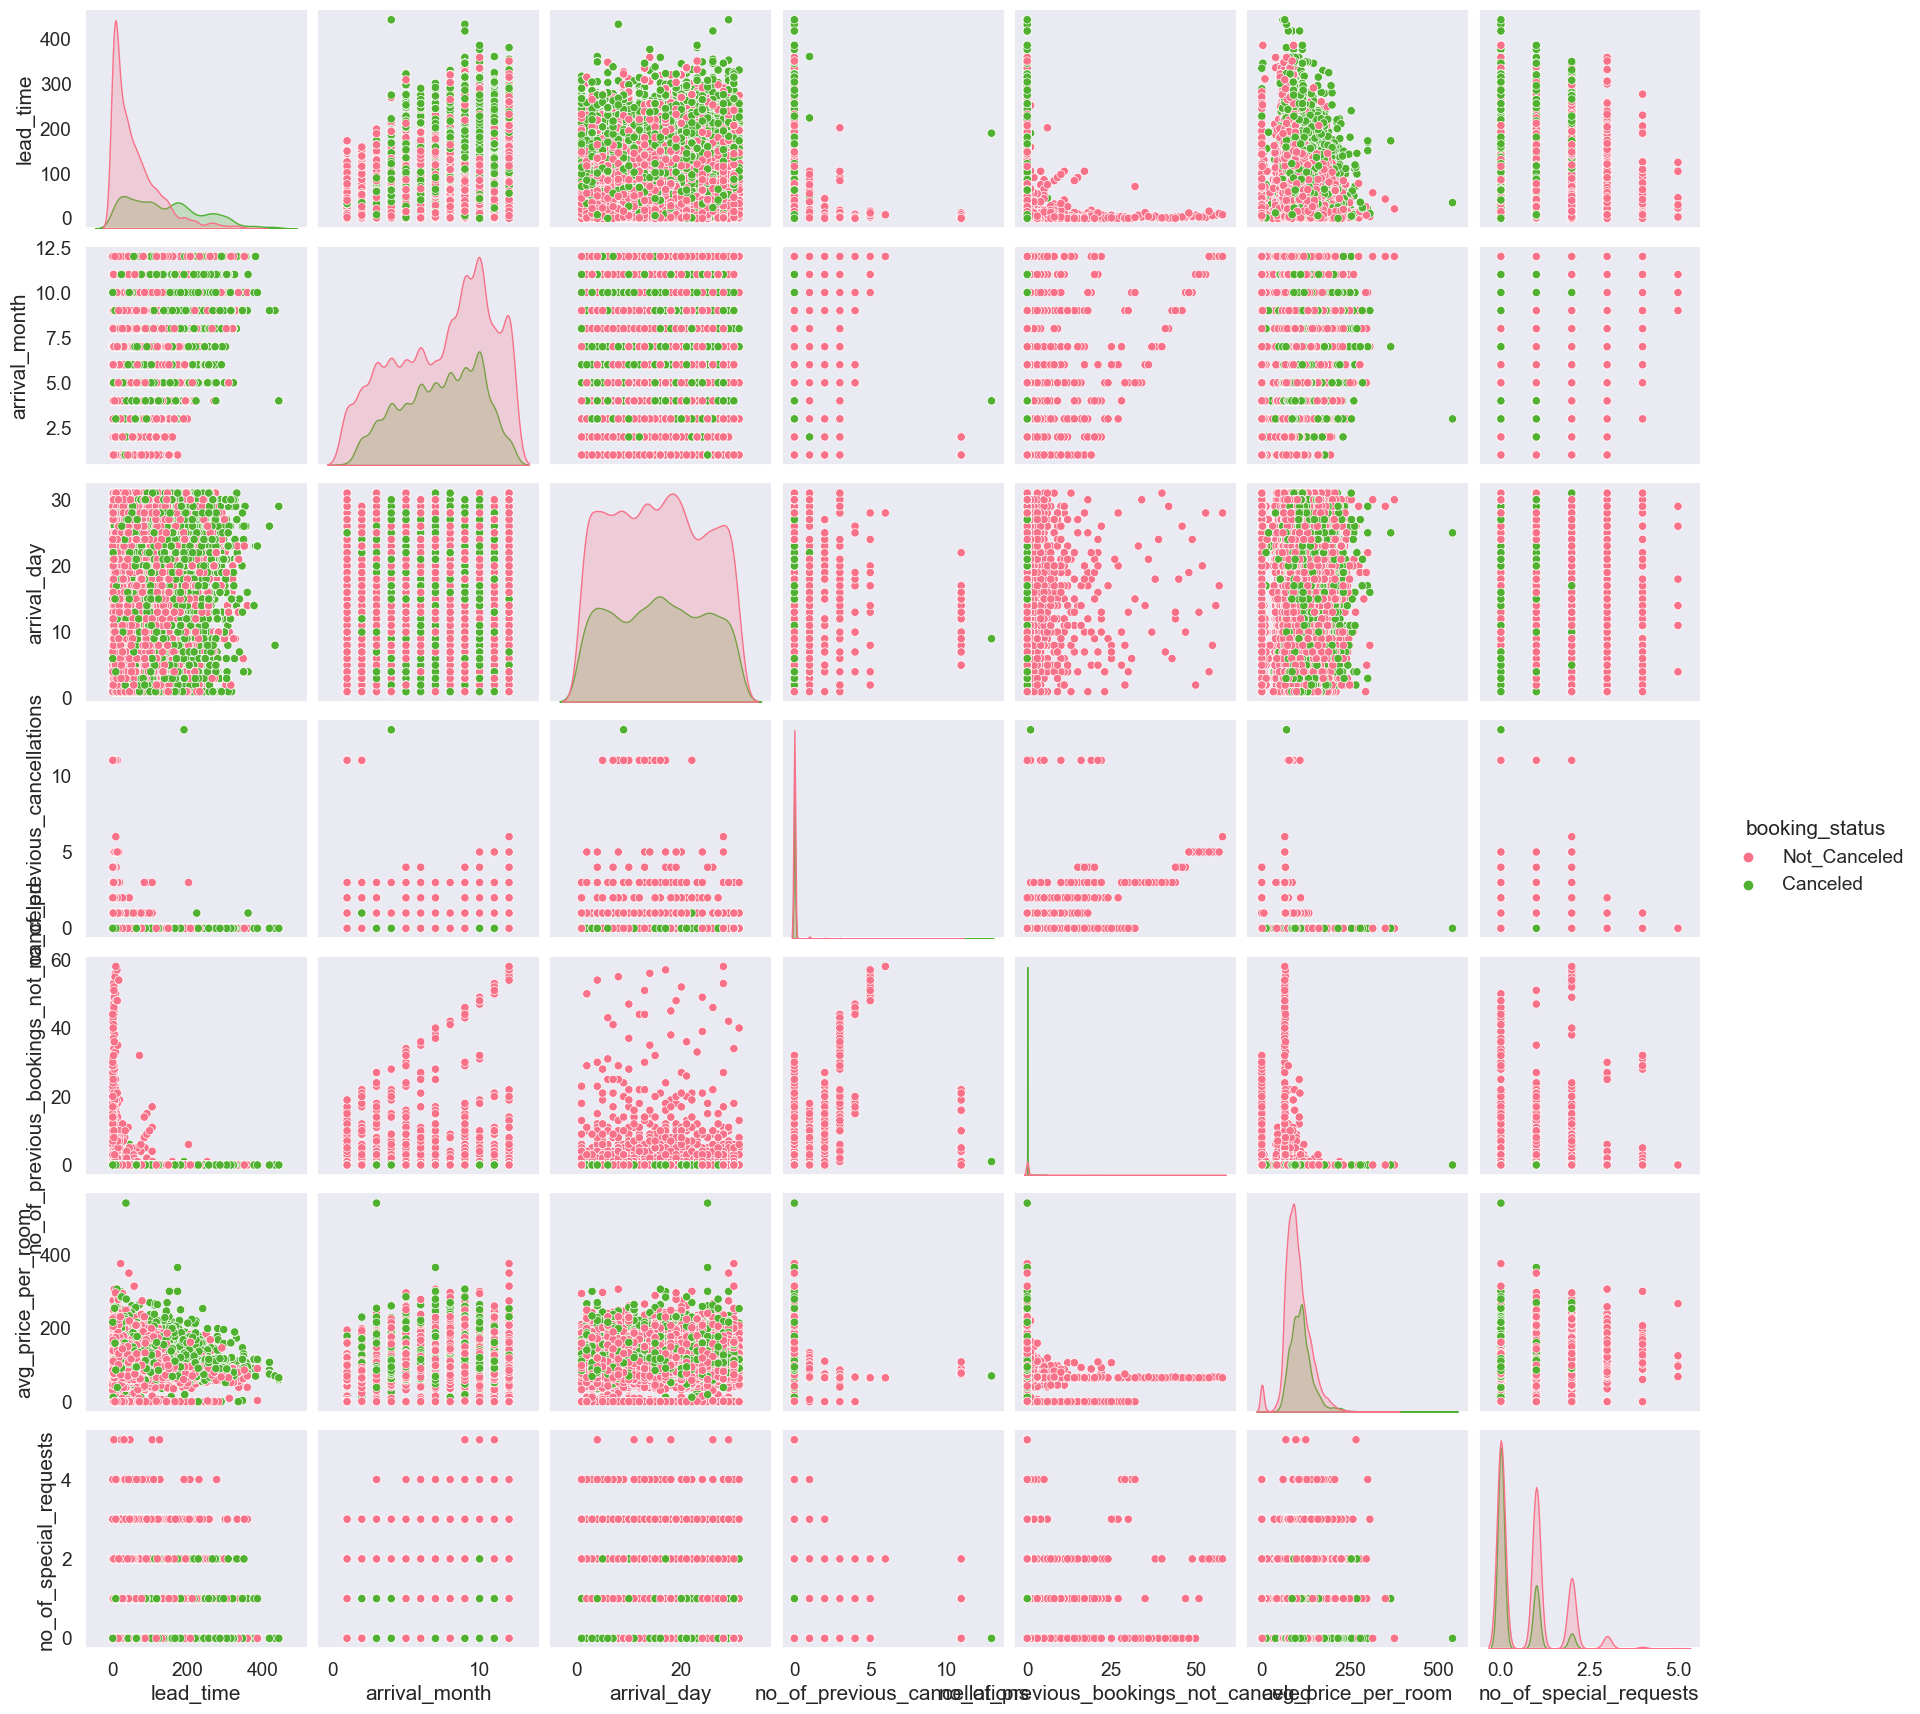

In [24]:
sns.pairplot(data=hotel_df, vars=['lead_time','arrival_month','arrival_day'
                                  ,'no_of_previous_cancellations','no_of_previous_bookings_not_canceled'
                                  ,'avg_price_per_room','no_of_special_requests'],hue='booking_status')
plt.xticks(rotation=90)
plt.show()

In [25]:
#target variable
hotel_df['booking_status']= np.where(hotel_df['booking_status'] == 'Not_Canceled',1,0)
#measure correlation between variables
hotel_df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_day,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.020181,0.108161,0.103260,0.099683,0.075804,0.024503,0.029431,-0.049780,-0.120411,0.293796,0.190206,-0.089566
no_of_children,-0.020181,1.000000,0.024500,0.022716,-0.048709,0.044962,-0.005426,0.023318,-0.016504,-0.021072,0.336193,0.124367,-0.035163
no_of_weekend_nights,0.108161,0.024500,1.000000,0.180110,0.044697,0.055731,-0.014973,0.023961,-0.019458,-0.025965,-0.005411,0.056612,-0.063669
no_of_week_nights,0.103260,0.022716,0.180110,1.000000,0.145215,0.031207,0.039016,-0.012692,-0.031292,-0.048992,0.021804,0.046309,-0.092307
lead_time,0.099683,-0.048709,0.044697,0.145215,1.000000,0.144530,0.135878,0.005602,-0.045424,-0.078643,-0.061175,-0.098837,-0.438224
arrival_year,0.075804,0.044962,0.055731,0.031207,0.144530,1.000000,-0.341794,0.017182,0.003551,0.027151,0.178694,0.047459,-0.179635
arrival_month,0.024503,-0.005426,-0.014973,0.039016,0.135878,-0.341794,1.000000,-0.044252,-0.034312,-0.005721,0.052163,0.110574,0.012202
arrival_day,0.029431,0.023318,0.023961,-0.012692,0.005602,0.017182,-0.044252,1.000000,-0.014343,-0.001970,0.017707,0.022258,-0.004074
no_of_previous_cancellations,-0.049780,-0.016504,-0.019458,-0.031292,-0.045424,0.003551,-0.034312,-0.014343,1.000000,0.475519,-0.064457,-0.002572,0.033499
no_of_previous_bookings_not_canceled,-0.120411,-0.021072,-0.025965,-0.048992,-0.078643,0.027151,-0.005721,-0.001970,0.475519,1.000000,-0.114851,0.030131,0.060992


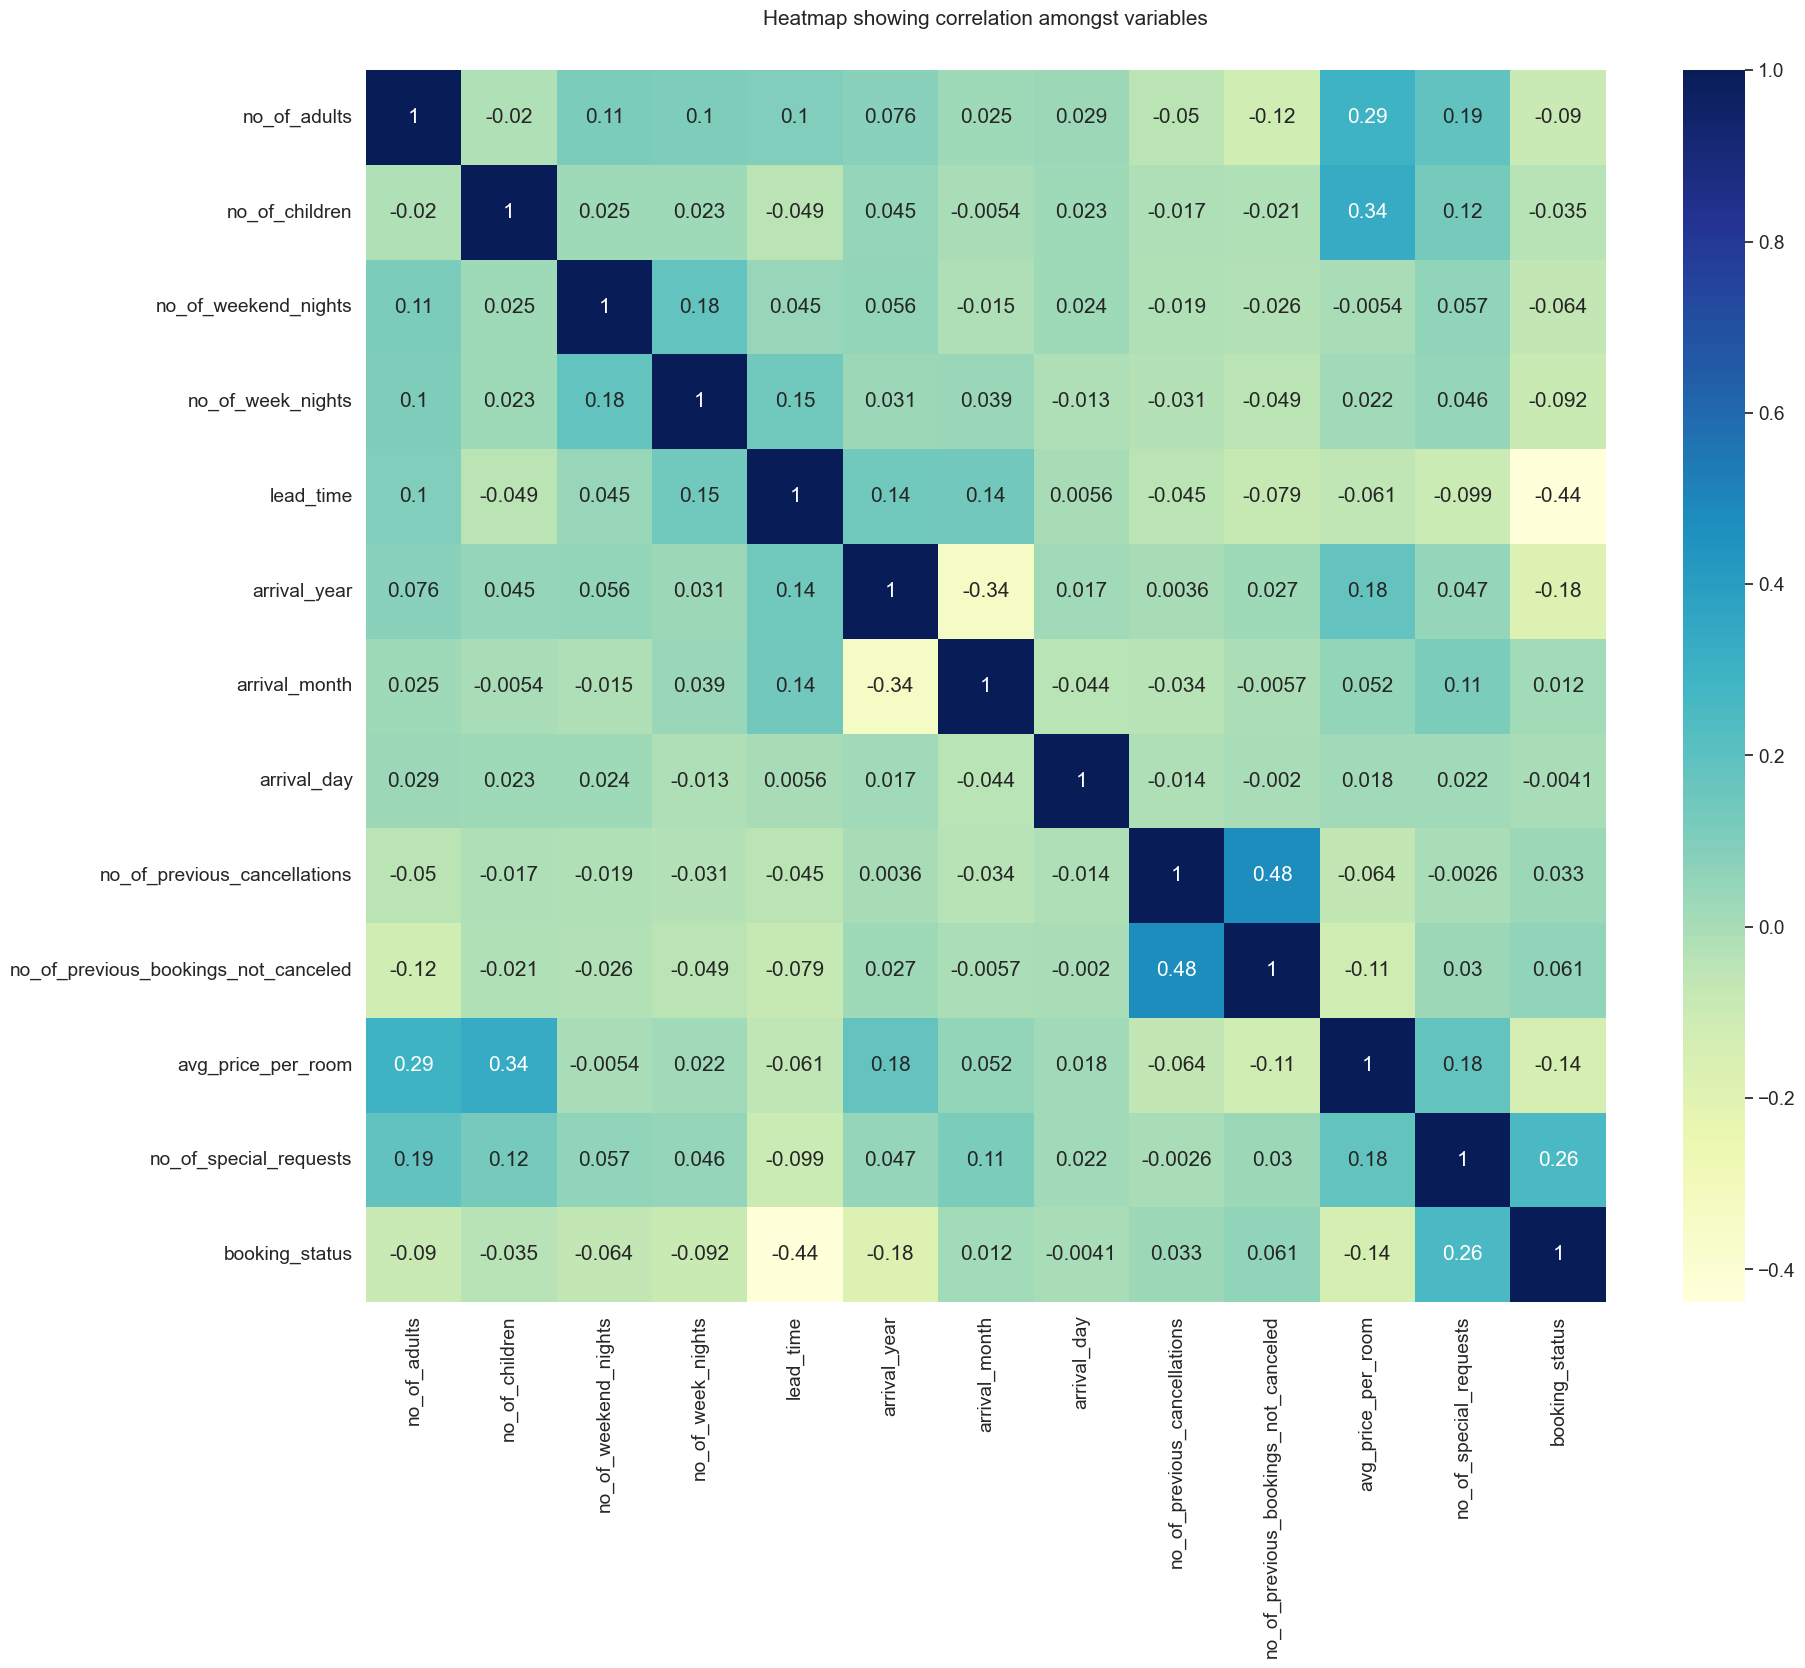

In [37]:
#visualizing correlation between variables
plt.figure(figsize=(20,16))
sns.heatmap(hotel_df.corr(), cmap='YlGnBu', fmt='.2g', annot=True)

plt.title('Heatmap showing correlation amongst variables',y=1.03)
plt.show()

## Data Visualization summary

From the visualizations:

 - The **price per room over time** graph shows that the people who cancelled thier booking where does who had the highest prices for rooms. 
 
 - The **lead time by prices** graph shows that people who had shorter Number of days before the arrival date the booking was made were more likely to not to cancel their booking. 
 
 - The **count of various Reserved Room Types** shows that Room Type1 is the most Reserved room for both persons who canceled and those who did not cancel thier bookings
 
 - The **weekday by booking status graph** shows majority of cancelled booking were on sunday, however sunday had majority of bookings.
 
 - The **heat map shows that number of special request and booking statuses have moderate relationship, while the number of previous booking not canceled has a weak relationship with booking status. We can also see that Lead time have a negative moderate relationship with booking status.**

In [27]:
#preprocessing categorical columns using pd get dummies
#dropping booking id and attended column
features = hotel_df.drop(['arrival_month','arrival_day'
,'Booking_ID','booking_status','arrival_date','arrival_year'], axis=1)
features

#using pandas get dummies encoder
X_features = pd.get_dummies(features, columns =['type_of_meal_plan','room_type_reserved','arrival_day_of_week'
                                                  ,'market_segment_type','month_name'])
X = X_features.values

y = hotel_df['booking_status'].values

print('X shape:', X.shape)

print('y shape:', y.shape)

X shape: (29200, 46)
y shape: (29200,)


In [28]:
#import modules and packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score , recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

#train test split features and target varibales
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=23)

## Model Selection

I would be using **Logistic Regression ** as baseline model, while **DecisionTreeClassifier and RandomForestClassifier** as comparison model.

Firstly looking at their various scores for accuracy,precision and recall the **RandomForestClassifier outperformed the other models having a accuracy_score : 0.89, precision_score : 0.90 and recall_score : 0.94.** Followed by the **decision Tree Classifier with an accuracy_score : 0.86 , precision_score : 0.90 and recall_score : 0.89**. The least performing model was the **Logistic Regression which had accuracy_score : 0.81, precision_score : 0.84 and recall_score : 0.89.**

**Logistic Regression**
 For the LogisticRegression model recall that it is a classification problem with classes 0 and 1. We notice that the coefficients are both positive and negative values. The positive scores indicate a feature that predicts class 1(Not_Canceled), whereas the negative scores indicate a feature that predicts class 0(Canceled).
 
 We observe that the market segement type **'Offline'** ,Required parking space and book made in the **'month of january'** were the most important feature for predicting a client canceling their booking.**That is, most people who canceled thier booking booked Offline, required a parking space , and booked in the month of january**
 
 
 **DecisionTreeClassifier**
 A DecisionTreeClassifier provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.
 From the fitted model below we observe that **lead time ,average price per room , and booking Online** were the most important feature for predicting a client canceling booking or not.
 
 
**RandomForestClassifier**
 A RandomForestClassifier provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.
 From the fitted model below we observe that **lead time, average price per room, and number of special request** were the most important feature for predicting a client canceling a booking or not.

### LOGISTIC REGRESSION

In [39]:
# define the model
model = LogisticRegression(random_state=23, max_iter=1000)
# fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#check model accuracy, precison and recall score
acc_score = accuracy_score(y_test, y_pred)
print('accuracy_score :', acc_score)
pre_score = precision_score(y_test, y_pred)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, y_pred)
print('recall_score :',rec_score)

accuracy_score : 0.8143835616438356
precision_score : 0.8418015707645456
recall_score : 0.8915294517059922


In [30]:
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('log', LogisticRegression())]
pipeline = Pipeline(steps)
# fit the model
log_scaled = pipeline.fit(X_train, y_train)
y_pred = log_scaled.predict(X_test)
#check model accuracy, precison and recall score
acc_score = accuracy_score(y_test, y_pred)
print('accuracy_score :', acc_score)
pre_score = precision_score(y_test, y_pred)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, y_pred)
print('recall_score :',rec_score)

accuracy_score : 0.813013698630137
precision_score : 0.8410585404971933
recall_score : 0.890171447971482


In [40]:
names = X_features.columns


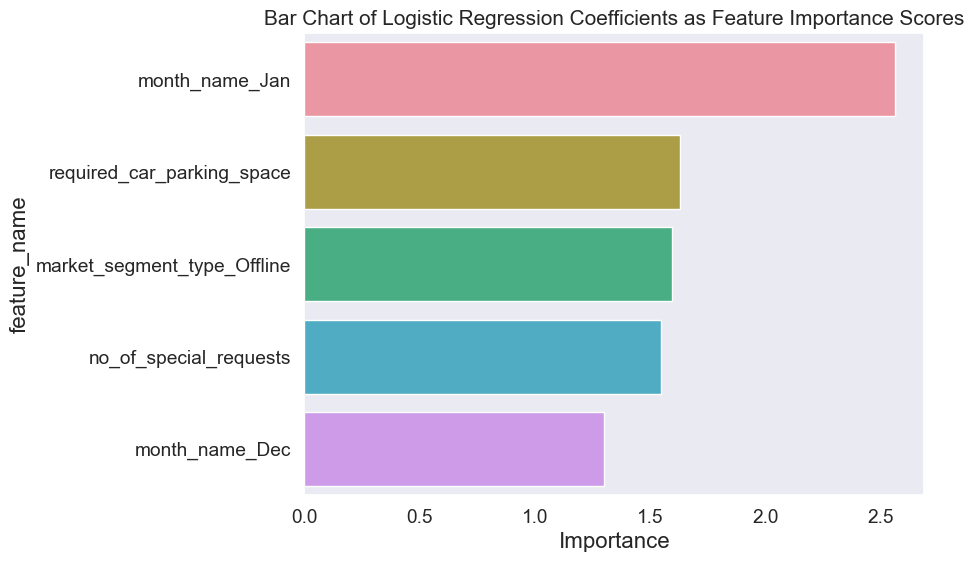

In [43]:
# get importance 
importance = model.coef_[0]

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Logistic Regression Coefficients as Feature Importance Scores')
plt.show()

### DECISION TREE CLASSIFIER

In [44]:
# define the model
model = DecisionTreeClassifier(random_state=23)
# fit the model
model.fit(X_train, y_train)
ypred = model.predict(X_test)
#check model accuracy, precison and recall score
acc_score = accuracy_score(y_test, ypred)
print('accuracy_score :', acc_score)
pre_score = precision_score(y_test, ypred)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, ypred)
print('recall_score :',rec_score)

accuracy_score : 0.8641552511415526
precision_score : 0.9033808134546079
recall_score : 0.8935664573077576


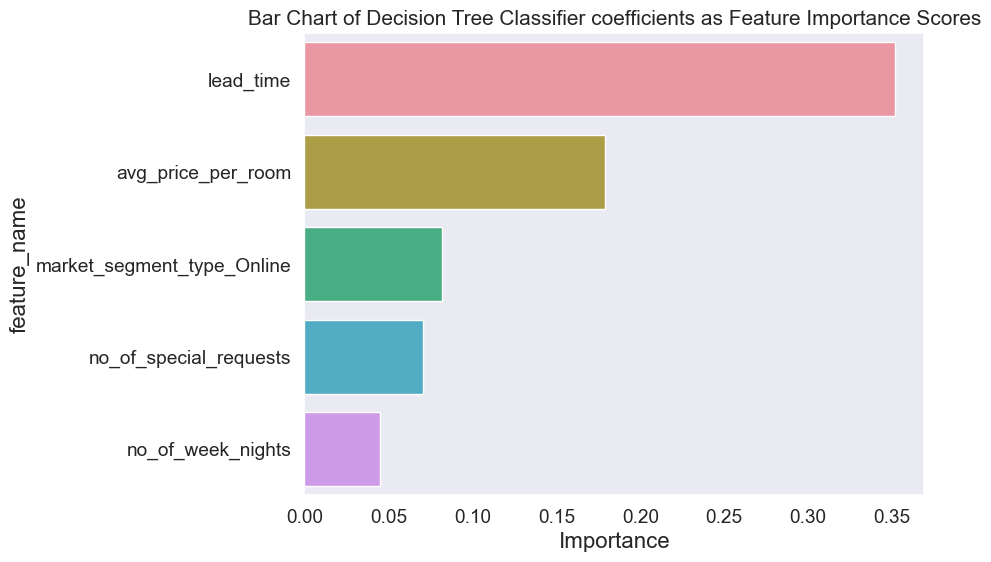

In [46]:
# get importance
importance = model.feature_importances_

# plot feature importance
imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Decision Tree Classifier coefficients as Feature Importance Scores')
plt.show()

### RANDOM FOREST CLASSIFIER

In [47]:
# define the model
model = RandomForestClassifier(random_state=23)
# fit the model
model.fit(X_train, y_train)
ypred = model.predict(X_test)
#check model accuracy, precison and recall score
acc_score = accuracy_score(y_test, ypred)
print('accuracy_score :', acc_score)
pre_score = precision_score(y_test, ypred)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, ypred)
print('recall_score :',rec_score)

accuracy_score : 0.8972602739726028
precision_score : 0.9049164368002596
recall_score : 0.9466983534204719


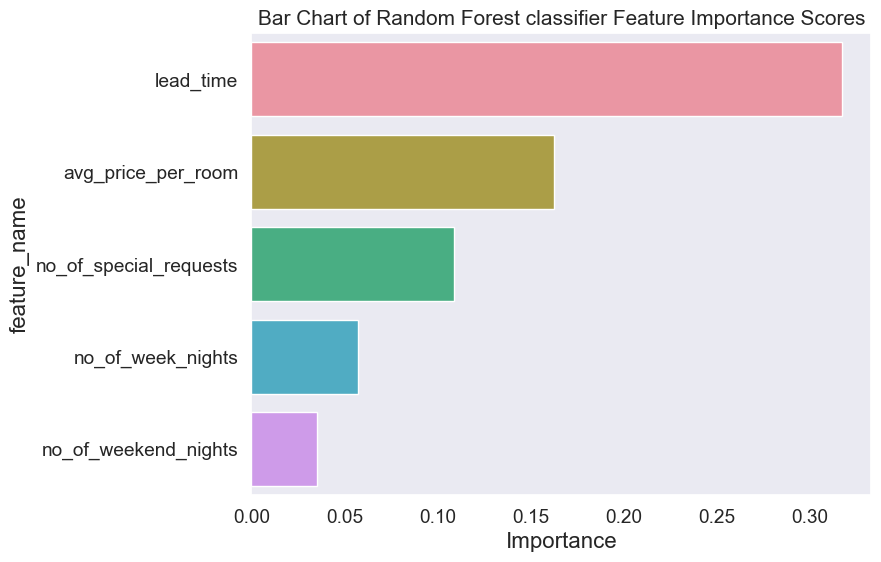

In [48]:
# get importance
importance = model.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Random Forest classifier Feature Importance Scores')
plt.show()

## Recommendations

From the analysis above, It can be seen that factors like :
 - If an individual made reservations Offline or Online
 - If individual requested for parking space
 - If booking was done in the month of January
 - The number of days before the arrival date the booking was made(lead time).
 - The average price of the room booked
 - The number of special request made by the individual.
 are very important factors to be considered as they most likely will determine if an individual will cancel the booking made .
 
 Further I will recommend for the busines to use these important factors in predicting whether a customer will cancel or not.